In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import mstats

# Chargement & Exploration initiale des données

In [3]:
df = pd.read_excel("voitures_avito.xlsx")

In [4]:
df.head()

,titre,prix,ville,description,type,category,phone,seller_name,seller_address,seller_img,seller_uuid,images,url
0,Location de Voitures Huren Cars - Dès 200 Dhs/...,NaN,Casablanca,Découvrez l'excellence chez Huren Cars - Votre...,à louer,Voitures de location,701708000.0,Huren Cars,Casablanca,https://content.avito.ma/stores/52/52155b17-23...,S6273,['https://content.avito.ma/classifieds/images/...,https://www.avito.ma/fr/centre_ville/voitures_...
1,BMW série 4 420d diesel,220000.0,Rabat,Je mets en vente une BMW série 4 420d «pack sp...,à vendre,Voitures d'occasion,620544030.0,BMW,NaN,NaN,A2907077,['https://content.avito.ma/classifieds/images/...,https://www.avito.ma/fr/agdal/voitures_d'occas...
2,Alfa Romeo Giulietta automatique 2015,NaN,Agadir,Voiture bon état,à vendre,Voitures d'occasion,635826002.0,AL moukaouama auto,N4 imm afrah avenu al moukaouama,https://content.avito.ma/stores/67/6749f0d4-af...,S5445,['https://content.avito.ma/classifieds/images/...,https://www.avito.ma/fr/av_mokawama/voitures_d...
3,Volkswagen Touareg Diesel Automatique 2016,162000.0,Martil,"Volkswagen touareg V6 TDI , Une voiture en trè...",à vendre,Voitures d'occasion,629388459.0,new user,NaN,NaN,A9142928,['https://content.avito.ma/classifieds/images/...,https://www.avito.ma/fr/martil/voitures_d'occa...
4,Renault Clio Diesel Automatique 2019 à Agadir,NaN,Agadir,Voiture bon état automatique 2019,à vendre,Voitures d'occasion,635826002.0,AL moukaouama auto,N4 imm afrah avenu al moukaouama,https://content.avito.ma/stores/67/6749f0d4-af...,S5445,['https://content.avito.ma/classifieds/images/...,https://www.avito.ma/fr/av_mokawama/voitures_d...


In [5]:
df.shape

(910, 13)

In [7]:
df.columns

Index(['titre', 'prix', 'ville', 'description', 'type', 'category', 'phone',
       'seller_name', 'seller_address', 'seller_img', 'seller_uuid', 'images',
       'url'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titre           910 non-null    object 
 1   prix            597 non-null    float64
 2   ville           910 non-null    object 
 3   description     910 non-null    object 
 4   type            910 non-null    object 
 5   category        910 non-null    object 
 6   phone           901 non-null    float64
 7   seller_name     910 non-null    object 
 8   seller_address  475 non-null    object 
 9   seller_img      601 non-null    object 
 10  seller_uuid     910 non-null    object 
 11  images          910 non-null    object 
 12  url             910 non-null    object 
dtypes: float64(2), object(11)
memory usage: 92.6+ KB


In [11]:
df.describe()

,prix,phone
count,5.970000e+02,9.010000e+02
mean,1.515411e+05,6.604212e+08
std,1.959959e+05,4.084049e+07
min,1.490000e+02,5.204951e+08
25%,2.500000e+02,6.560808e+08
50%,1.280000e+05,6.618192e+08
75%,2.150000e+05,6.664685e+08
max,2.750000e+06,7.987991e+08


# Traitement des valeurs manquantes

In [12]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

prix              313
phone               9
seller_address    435
seller_img        309
dtype: int64


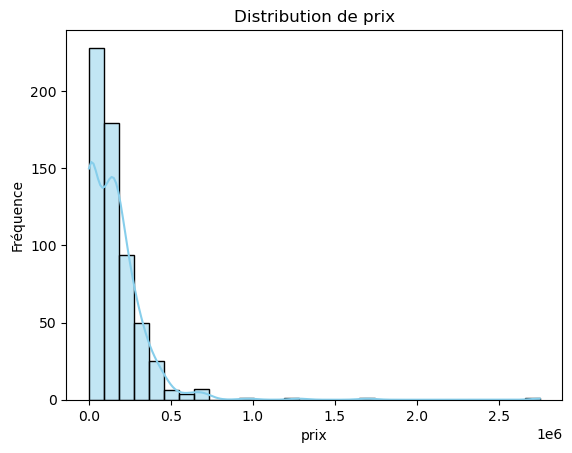

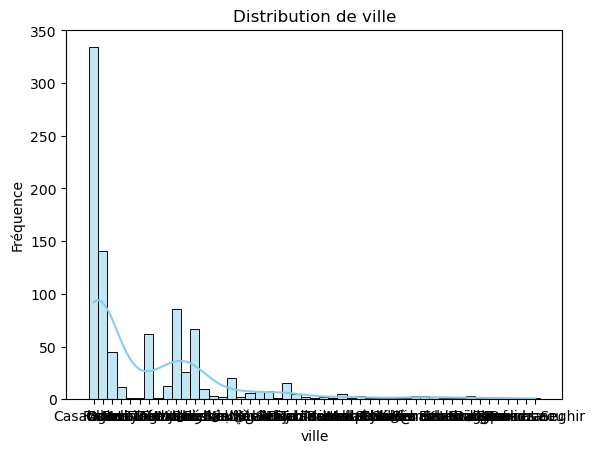

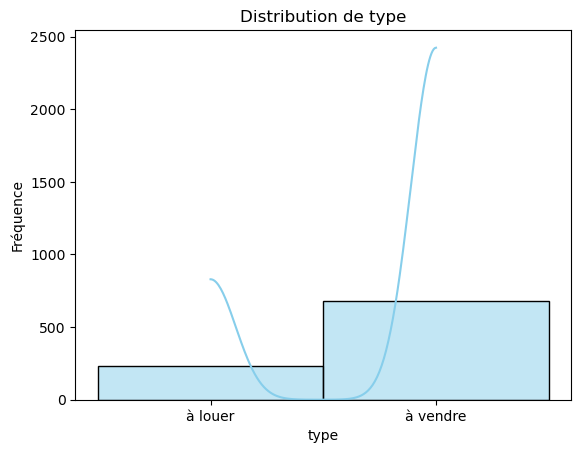

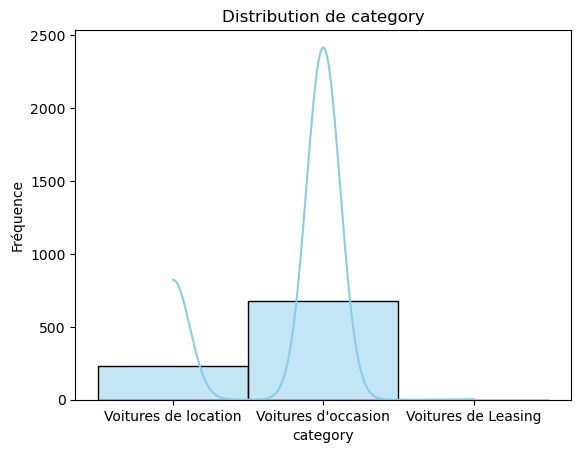

In [34]:
columns = ['prix', 'ville', 'type', 'category']

for col in columns:
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title("Distribution de " + col)
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    # plt.xticks(rotation=90)
    plt.show()

In [39]:
print("Asymétrie (skewness) de prix est : " , df["prix"].skew())

Asymétrie (skewness) de prix est :  5.5540563468766715
